In [13]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

In [1]:
import pandas as pd 

df = pd.DataFrame.from_csv('10K_sample.txt', sep='\t', header=0)

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
df.head()

,state,id,link,county,newspaper,date,content,notice_id
320471,Arizona,29/12152016_23843750,http://www.publicnoticeads.com/AZ/search/view....,Maricopa,Arizona Business Gazette (Phoenix),2016/12/15,NOTICE (for publication) ARTICLES OF ORGANIZAT...,23843750.0
428137,Wyoming,3468/11152016_23781745,http://www.publicnoticeads.com/WY/search/view....,Natrona,Casper Star-Tribune,2016/11/15,ADVERTISEMENT FOR BIDS FOR FRONTIER MIDDLE SCH...,23781745.0
171469,Nevada,3371/10312016_23751825,http://www.publicnoticeads.com/NV/search/view....,Clark,Nevada Legal News,2016/10/27,NOTICE OF SALE APN: 177-21-310-169 Order No: H...,23751825.0
486209,Arizona,42/5172017_24138674,http://www.publicnoticeads.com/AZ/search/view....,Maricopa,Arizona Business Gazette (Phoenix),2017/05/18,NO. CV2017-00580 SUMMONS IN THE SUPERIOR COURT...,24138674.0
227894,Tennessee,2898/5122017_24128271,http://www.publicnoticeads.com/TN/search/view....,Davidson,"Tennessean, The (Nashville)",2017/05/12,0002131718 PUBLIC NOTICE The following vehicle...,24128271.0


In [ ]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
import pandas as pd

df['content'] =df['content'].astype(str)

In [7]:
df['content'] =df['content'].str.lower()
texts = df['content'].tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
df['POS'] = tagged_texts

In [8]:
print(len(df))
df.head()

10000


,state,id,link,county,newspaper,date,content,notice_id,POS
320471,Arizona,29/12152016_23843750,http://www.publicnoticeads.com/AZ/search/view....,Maricopa,Arizona Business Gazette (Phoenix),2016/12/15,notice (for publication) articles of organizat...,23843750.0,"[(notice, NN), ((, (), (for, IN), (publication..."
428137,Wyoming,3468/11152016_23781745,http://www.publicnoticeads.com/WY/search/view....,Natrona,Casper Star-Tribune,2016/11/15,advertisement for bids for frontier middle sch...,23781745.0,"[(advertisement, NN), (for, IN), (bids, NNS), ..."
171469,Nevada,3371/10312016_23751825,http://www.publicnoticeads.com/NV/search/view....,Clark,Nevada Legal News,2016/10/27,notice of sale apn: 177-21-310-169 order no: h...,23751825.0,"[(notice, NN), (of, IN), (sale, NN), (apn, NN)..."
486209,Arizona,42/5172017_24138674,http://www.publicnoticeads.com/AZ/search/view....,Maricopa,Arizona Business Gazette (Phoenix),2017/05/18,no. cv2017-00580 summons in the superior court...,24138674.0,"[(no, DT), (., .), (cv2017-00580, JJ), (summon..."
227894,Tennessee,2898/5122017_24128271,http://www.publicnoticeads.com/TN/search/view....,Davidson,"Tennessean, The (Nashville)",2017/05/12,0002131718 public notice the following vehicle...,24128271.0,"[(0002131718, CD), (public, JJ), (notice, RB),..."


In [9]:
TAG = ['RB','WRB','IN','TO','VB','VBD','VBG','VBN','VBP','VBZ','WP','CC','CD','DT','FW','JJ','LS','MD','NN','NNS','PRP','PRP$']

In [15]:
from collections import Counter

def apply_tagging(row):
    
    pos_tag = []
    tagged = row
    for t in tagged:
        word , tag = t
        if tag in TAG:
            pos_tag.append(tag)
    
    cnt = Counter(pos_tag)
    return cnt

In [16]:
df['pos_dist'] = df.POS.progress_apply(apply_tagging)

In [23]:
df_pos = pd.DataFrame(df['pos_dist'].values.tolist(), index=df.index)

In [24]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,RB,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB
320471,3.0,10.0,12.0,NaN,10.0,16.0,NaN,NaN,45.0,5.0,...,3.0,1.0,5.0,NaN,NaN,4.0,3.0,4.0,1.0,NaN
428137,25.0,34.0,63.0,NaN,84.0,44.0,NaN,20.0,168.0,36.0,...,12.0,13.0,27.0,9.0,10.0,38.0,4.0,14.0,1.0,NaN
171469,17.0,66.0,42.0,NaN,107.0,41.0,NaN,3.0,202.0,31.0,...,17.0,6.0,10.0,6.0,3.0,25.0,4.0,5.0,NaN,NaN
486209,16.0,16.0,39.0,NaN,58.0,42.0,NaN,4.0,112.0,23.0,...,7.0,6.0,9.0,3.0,3.0,11.0,7.0,6.0,NaN,NaN
227894,2.0,55.0,1.0,NaN,6.0,40.0,NaN,1.0,68.0,6.0,...,2.0,NaN,1.0,3.0,1.0,NaN,2.0,NaN,NaN,NaN


In [25]:
df_pos = df_pos.fillna(0)

In [62]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,RB,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB
320471,3.0,10.0,12.0,0.0,10.0,16.0,0.0,0.0,45.0,5.0,...,3.0,1.0,5.0,0.0,0.0,4.0,3.0,4.0,1.0,0.0
428137,25.0,34.0,63.0,0.0,84.0,44.0,0.0,20.0,168.0,36.0,...,12.0,13.0,27.0,9.0,10.0,38.0,4.0,14.0,1.0,0.0
171469,17.0,66.0,42.0,0.0,107.0,41.0,0.0,3.0,202.0,31.0,...,17.0,6.0,10.0,6.0,3.0,25.0,4.0,5.0,0.0,0.0
486209,16.0,16.0,39.0,0.0,58.0,42.0,0.0,4.0,112.0,23.0,...,7.0,6.0,9.0,3.0,3.0,11.0,7.0,6.0,0.0,0.0
227894,2.0,55.0,1.0,0.0,6.0,40.0,0.0,1.0,68.0,6.0,...,2.0,0.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0


In [44]:
col = df_pos.columns.tolist()
print(col)

['CC', 'CD', 'DT', 'FW', 'IN', 'JJ', 'LS', 'MD', 'NN', 'NNS', 'PRP', 'PRP$', 'RB', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WP', 'WRB']


In [70]:
df_pos['total'] = df_pos.sum(axis=1)

In [71]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
320471,3.0,10.0,12.0,0.0,10.0,16.0,0.0,0.0,45.0,5.0,...,1.0,5.0,0.0,0.0,4.0,3.0,4.0,1.0,0.0,122.0
428137,25.0,34.0,63.0,0.0,84.0,44.0,0.0,20.0,168.0,36.0,...,13.0,27.0,9.0,10.0,38.0,4.0,14.0,1.0,0.0,607.0
171469,17.0,66.0,42.0,0.0,107.0,41.0,0.0,3.0,202.0,31.0,...,6.0,10.0,6.0,3.0,25.0,4.0,5.0,0.0,0.0,593.0
486209,16.0,16.0,39.0,0.0,58.0,42.0,0.0,4.0,112.0,23.0,...,6.0,9.0,3.0,3.0,11.0,7.0,6.0,0.0,0.0,369.0
227894,2.0,55.0,1.0,0.0,6.0,40.0,0.0,1.0,68.0,6.0,...,0.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,188.0


In [84]:
del df_norm

In [85]:
df_norm = df_pos.div(df_pos.total, axis=0)

In [86]:
df_norm.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
320471,0.024590,0.081967,0.098361,0.0,0.081967,0.131148,0.0,0.000000,0.368852,0.040984,...,0.008197,0.040984,0.000000,0.000000,0.032787,0.024590,0.032787,0.008197,0.0,1.0
428137,0.041186,0.056013,0.103789,0.0,0.138386,0.072488,0.0,0.032949,0.276771,0.059308,...,0.021417,0.044481,0.014827,0.016474,0.062603,0.006590,0.023064,0.001647,0.0,1.0
171469,0.028668,0.111298,0.070826,0.0,0.180438,0.069140,0.0,0.005059,0.340641,0.052277,...,0.010118,0.016863,0.010118,0.005059,0.042159,0.006745,0.008432,0.000000,0.0,1.0
486209,0.043360,0.043360,0.105691,0.0,0.157182,0.113821,0.0,0.010840,0.303523,0.062331,...,0.016260,0.024390,0.008130,0.008130,0.029810,0.018970,0.016260,0.000000,0.0,1.0
227894,0.010638,0.292553,0.005319,0.0,0.031915,0.212766,0.0,0.005319,0.361702,0.031915,...,0.000000,0.005319,0.015957,0.005319,0.000000,0.010638,0.000000,0.000000,0.0,1.0


In [94]:
df_norm.loc['sum'] = df_norm.sum(axis=0)

In [109]:
df_norm.tail()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
198654,0.006536,0.130719,0.104575,0.000000,0.137255,0.058824,0.000000,0.000000,0.366013,0.032680,...,0.013072,0.013072,0.019608,0.013072,0.052288,0.006536,0.006536,0.000000,0.000000,1.0
281238,0.000000,0.127389,0.133758,0.000000,0.121019,0.101911,0.000000,0.025478,0.305732,0.031847,...,0.038217,0.044586,0.000000,0.019108,0.000000,0.012739,0.012739,0.000000,0.000000,1.0
453480,0.041116,0.118943,0.069016,0.002937,0.157122,0.085169,0.000000,0.002937,0.249633,0.101322,...,0.011747,0.022026,0.032305,0.020558,0.030837,0.010279,0.005874,0.000000,0.000000,1.0
316732,0.048387,0.072581,0.120968,0.000000,0.104839,0.080645,0.000000,0.000000,0.379032,0.056452,...,0.000000,0.000000,0.008065,0.000000,0.024194,0.032258,0.048387,0.016129,0.000000,1.0
sum,349.124342,863.148779,974.226904,23.999636,1278.529119,951.477330,0.015362,133.219752,3234.201720,470.363536,...,209.773609,297.102301,124.548759,109.870458,357.004600,122.293496,176.070247,16.869520,3.603869,9997.0


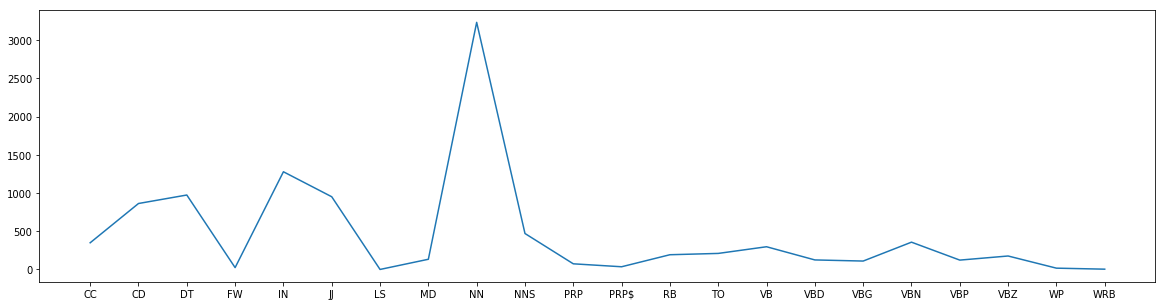

In [112]:
from matplotlib import pyplot as plt

row = df_norm.loc['sum']
row = row[:-1]
row.plot(figsize = (20,5))
plt.xticks(range(len(col)),col)
plt.show()